# 自編碼器Auto-Encoder  (pytorch)

###測試於pytorch 1.0

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function 
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import codecs
import math
import random
import pickle
from PIL import Image

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim


use_cuda=True

In [3]:
train_data=None
test_data=None

with open('../Data/mnist_train.pkl', 'rb') as f:
    train_data = pickle.load(f)
    print(len(train_data))
with open('../Data/mnist_test.pkl', 'rb') as f:
    test_data = pickle.load(f)
    print(len(test_data))
    
def parse_mnist(data):
    features=[]
    labels=[]
    for row in data:
        labels.append(row[-1].astype(np.int64))
        features.append(row[:-1].astype(np.float32)/255.0)
    return np.asarray(features),np.asarray(labels)

features,labels=parse_mnist(train_data)
print(features[:3])

idxs=np.arange(0,train_data.shape[0])
random.shuffle(idxs)
idx=0

print(features.shape)
print(labels.shape)


60000
10000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 784)
(60000,)


In [4]:
def get_next_minibatch(minibatch_size):
    global idxs,idx
    x_features=[]
    y_labels=[]
    while len(x_features)<minibatch_size:
        x_features.append(features[idxs[idx]])
        y_labels.append(labels[idxs[idx]])
        idx+=1
        if idx>=len(idxs):
            idx=0
            random.shuffle(idxs)
    return np.asarray(x_features).astype(np.float32),np.asarray(y_labels).astype(np.float32)

features_x,labels_y=get_next_minibatch(3)
print(features_x.shape)
print(labels_y.shape)

(3, 784)
(3,)


5


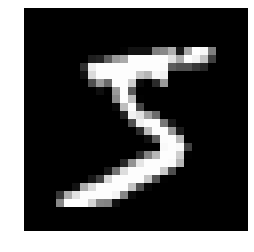

In [5]:
img=Image.fromarray(np.reshape(features[0,:]*255,(28,28)).astype(np.uint8))
plt.axis('off')
plt.imshow(img, cmap='gray', interpolation='nearest')

print(labels[0])


In [6]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.d1 = nn.Linear(784, 512)
        self.d2 = nn.Linear(512, 256)
        self.d3 = nn.Linear(256, 128)
        self.d4 = nn.Linear(128, 64)
        self.d5 = nn.Linear(64, 32)
        self.d6 = nn.Linear(32, 64)
        self.d7 = nn.Linear(64, 128)
        self.d8 = nn.Linear(128, 256)
        self.d9 = nn.Linear(256, 512)
        self.d10 = nn.Linear(512, 784)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.d1(x))
        x = F.relu(self.d2(x))
        x = F.relu(self.d3(x))
        x = F.relu(self.d4(x))
        x = self.d5(x)
        x = F.relu(self.d6(x))
        x = F.relu(self.d7(x))
        x = F.relu(self.d8(x))
        x = F.relu(self.d9(x))
        x = F.relu(self.d10(x))
        return x

In [7]:
class autoencoder1(nn.Module):
    def __init__(self):
        super(autoencoder1, self).__init__()
        self.d1 = nn.Linear(784, 512)
        self.d2 = nn.Linear(512, 256)
        self.d3 = nn.Linear(256, 128)
        self.d4 = nn.Linear(128, 64)
        self.d5 = nn.Linear(64, 32)
        self.d6 = nn.Linear(32, 64)
        self.d7 = nn.Linear(64, 128)
        self.d8 = nn.Linear(128, 256)
        self.d9 = nn.Linear(256, 512)
        self.d10 = nn.Linear(512, 784)
        self.b1=nn.BatchNorm1d(num_features=512)
        self.b2=nn.BatchNorm1d(num_features=256)
        self.b3=nn.BatchNorm1d(num_features=128)
        self.b4=nn.BatchNorm1d(num_features=64)
        self.b5=nn.BatchNorm1d(num_features=32)
        self.b6=nn.BatchNorm1d(num_features=64)
        self.b7=nn.BatchNorm1d(num_features=128)
        self.b8=nn.BatchNorm1d(num_features=256)
        self.b9=nn.BatchNorm1d(num_features=512)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.d1(x))
        x =self.b1(x)
        x = F.relu(self.d2(x))
        x =self.b2(x)
        x = F.relu(self.d3(x))
        x =self.b3(x)
        x = F.relu(self.d4(x))
        x =self.b4(x)
        x = self.d5(x)
        x =self.b5(x)
        x = F.relu(self.d6(x))
        x =self.b6(x)
        x = F.relu(self.d7(x))
        x =self.b7(x)
        x = F.relu(self.d8(x))
        x =self.b8(x)
        x = F.relu(self.d9(x))
        x =self.b9(x)
        x = F.relu(self.d10(x))
        return x

In [8]:
class autoencoder2(nn.Module):
    def __init__(self):
        super(autoencoder2, self).__init__()
        self.d1 = nn.Linear(784, 512)
        self.d2 = nn.Linear(512, 256)
        self.d3 = nn.Linear(256, 128)
        self.d4 = nn.Linear(128, 64)
        self.d5 = nn.Linear(64, 32)
        self.d6 = nn.Linear(32, 64)
        self.d7 = nn.Linear(64, 128)
        self.d8 = nn.Linear(128, 256)
        self.d9 = nn.Linear(256, 512)
        self.d10 = nn.Linear(512, 784)
        self.b1=nn.BatchNorm1d(num_features=512)
        self.b2=nn.BatchNorm1d(num_features=256)
        self.b3=nn.BatchNorm1d(num_features=128)
        self.b4=nn.BatchNorm1d(num_features=64)
        self.b5=nn.BatchNorm1d(num_features=32)
        self.b6=nn.BatchNorm1d(num_features=64)
        self.b7=nn.BatchNorm1d(num_features=128)
        self.b8=nn.BatchNorm1d(num_features=256)
        self.b9=nn.BatchNorm1d(num_features=512)
        self.drop1=nn.Dropout1d(0.2)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.d1(x))
        x =self.b1(x)
        x = F.relu(self.d2(x))
        x =self.b2(x)
        x = self.drop1(x)
        x = F.relu(self.d3(x))
        x =self.b3(x)
        x = F.relu(self.d4(x))
        x =self.b4(x)
        x = self.d5(x)
        x =self.b5(x)
        x = F.relu(self.d6(x))
        x =self.b6(x)
        x = F.relu(self.d7(x))
        x =self.b7(x)
        x = F.relu(self.d8(x))
        x =self.b8(x)
        x = F.relu(self.d9(x))
        x =self.b9(x)
        x = F.relu(self.d10(x))
        return x

In [10]:
model = autoencoder1()
if use_cuda:
    model= model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.01)
ceriation = nn.MSELoss()
num_epochs=2
minibatch_size=32
for epoch in range(num_epochs):
    mbs=0
    rows=0
    ave_loss = 0
    while rows < train_data.shape[0]:
        optimizer.zero_grad()
        features_x,label_y=get_next_minibatch(minibatch_size)
        x, target = torch.from_numpy(features_x), torch.from_numpy(features_x)
        if use_cuda:
            x, target = x.cuda(), target.cuda()
        x, target = Variable(x), Variable(target)
        out = model(x)
        loss = ceriation(out, target)
        loss.backward()
        optimizer.step()
        if mbs%100==0 and mbs>0:
            print("Epoch: {}/{}...".format(epoch+1, num_epochs),
                          "Step: {}...".format(mbs),
                          "Loss: {:.4f}...".format(loss.data.item()))
        mbs+=1
        rows+=minibatch_size
        torch.save(model, 'Models/autoencoder_pytorch.cnn'.format(epoch))

C:\Anaconda3\lib\site-packages\torch\serialization.py:250: UserWarning: Couldn't retrieve source code for container of type autoencoder1. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1/2... Step: 100... Loss: 0.0464...
Epoch: 1/2... Step: 200... Loss: 0.0404...
Epoch: 1/2... Step: 300... Loss: 0.0435...
Epoch: 1/2... Step: 400... Loss: 0.0511...
Epoch: 1/2... Step: 500... Loss: 0.0461...
Epoch: 1/2... Step: 600... Loss: 0.0368...
Epoch: 1/2... Step: 700... Loss: 0.0441...
Epoch: 1/2... Step: 800... Loss: 0.0371...
Epoch: 1/2... Step: 900... Loss: 0.0363...
Epoch: 1/2... Step: 1000... Loss: 0.0352...
Epoch: 1/2... Step: 1100... Loss: 0.0333...
Epoch: 1/2... Step: 1200... Loss: 0.0361...
Epoch: 1/2... Step: 1300... Loss: 0.0400...
Epoch: 1/2... Step: 1400... Loss: 0.0382...
Epoch: 1/2... Step: 1500... Loss: 0.0307...
Epoch: 1/2... Step: 1600... Loss: 0.0344...
Epoch: 1/2... Step: 1700... Loss: 0.0310...
Epoch: 1/2... Step: 1800... Loss: 0.0331...
Epoch: 2/2... Step: 100... Loss: 0.0353...
Epoch: 2/2... Step: 200... Loss: 0.0265...
Epoch: 2/2... Step: 300... Loss: 0.0369...
Epoch: 2/2... Step: 400... Loss: 0.0348...
Epoch: 2/2... Step: 500... Loss: 0.0332...
Ep

(32, 784)
(28, 28)
(28, 28)


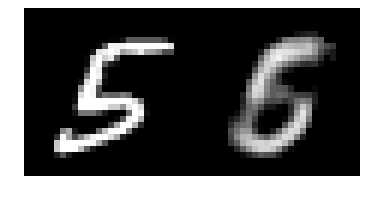

In [11]:

x,y=get_next_minibatch(minibatch_size)
input=torch.from_numpy(x)
input=Variable(input)
input=input.cuda()
output = model(input)
pred=output.cpu().detach().numpy()
print(pred.shape)
#實際值
actual=np.reshape(x[1,:]*255,(28,28)).astype(np.uint8)
pred=np.reshape(pred[1,:]*255,(28,28)).astype(np.uint8)
print(actual.shape)
print(pred.shape)
img=Image.fromarray(np.concatenate([actual,pred],axis=-1))
plt.axis('off')
plt.imshow(img, cmap='gray', interpolation='nearest')

# 去噪自編碼器 Denoise AutoEncoder

<img src="../Images/denoise.jpg">

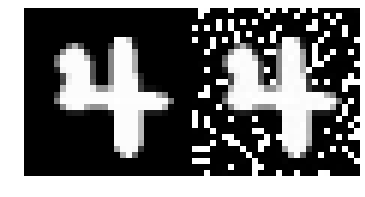

In [12]:
def get_next_noise_minibatch(minibatch_size):
    global idxs,idx
    x_features=[]
    x_noise=[]
    while len(x_features)<minibatch_size:
        x_features.append(features[idxs[idx]])
        x_noise.append(features[idxs[idx]]+np.random.standard_normal(784)*0.005)
        idx+=1
        if idx>=len(idxs):
            idx=0
            random.shuffle(idxs)
    return np.asarray(x_features).astype(np.float32),np.asarray(x_noise).astype(np.float32)

features_x,noise_x=get_next_noise_minibatch(3)
actual=np.reshape(features_x[0,:]*255,(28,28)).astype(np.uint8)
noise=np.reshape(noise_x[0,:]*255,(28,28)).astype(np.uint8)

img=Image.fromarray(np.concatenate([actual,noise],axis=-1))
plt.axis('off')
plt.imshow(img, cmap='gray', interpolation='nearest')

In [13]:
model1 = autoencoder1()
if use_cuda:
    model1 = model1.cuda()
optimizer = optim.Adam(model1.parameters(), lr=0.01)
ceriation = nn.MSELoss()
num_epochs=2
minibatch_size=32
for epoch in range(num_epochs):
    mbs=0
    rows=0
    ave_loss = 0
    while rows < train_data.shape[0]:
        optimizer.zero_grad()
        features_x,noise_x=get_next_noise_minibatch(minibatch_size)
        noise, target = torch.from_numpy(noise_x), torch.from_numpy(features_x)
        if use_cuda:
            noise, target = noise.cuda(), target.cuda()
        noise, target = Variable(noise), Variable(target)
        out = model1(noise)
        loss = ceriation(out, target)
        loss.backward()
        optimizer.step()
        if mbs%100==0 and mbs>0:
            print("Epoch: {}/{}...".format(epoch+1, num_epochs),
                          "Step: {}...".format(mbs),
                          "Loss: {:.4f}...".format(loss.data.item()))
        mbs+=1
        rows+=minibatch_size
        torch.save(model1, 'Models/denoise_autoencoder_pytorch.cnn'.format(epoch))

C:\Anaconda3\lib\site-packages\torch\serialization.py:250: UserWarning: Couldn't retrieve source code for container of type autoencoder1. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1/2... Step: 100... Loss: 0.0482...
Epoch: 1/2... Step: 200... Loss: 0.0473...
Epoch: 1/2... Step: 300... Loss: 0.0493...
Epoch: 1/2... Step: 400... Loss: 0.0517...
Epoch: 1/2... Step: 500... Loss: 0.0440...
Epoch: 1/2... Step: 600... Loss: 0.0427...
Epoch: 1/2... Step: 700... Loss: 0.0382...
Epoch: 1/2... Step: 800... Loss: 0.0410...
Epoch: 1/2... Step: 900... Loss: 0.0397...
Epoch: 1/2... Step: 1000... Loss: 0.0301...
Epoch: 1/2... Step: 1100... Loss: 0.0373...
Epoch: 1/2... Step: 1200... Loss: 0.0357...
Epoch: 1/2... Step: 1300... Loss: 0.0365...
Epoch: 1/2... Step: 1400... Loss: 0.0322...
Epoch: 1/2... Step: 1500... Loss: 0.0352...
Epoch: 1/2... Step: 1600... Loss: 0.0415...
Epoch: 1/2... Step: 1700... Loss: 0.0300...
Epoch: 1/2... Step: 1800... Loss: 0.0354...
Epoch: 2/2... Step: 100... Loss: 0.0329...
Epoch: 2/2... Step: 200... Loss: 0.0328...
Epoch: 2/2... Step: 300... Loss: 0.0278...
Epoch: 2/2... Step: 400... Loss: 0.0369...
Epoch: 2/2... Step: 500... Loss: 0.0320...
Ep

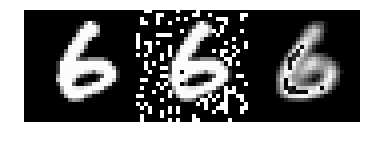

In [14]:
raw_features,raw_noise=get_next_noise_minibatch(minibatch_size)
input=torch.from_numpy(raw_noise)
input=Variable(input)
input=input.cuda()
output = model1(input)
results=output.cpu().detach().numpy()
#實際值
actual=np.reshape(raw_features[0,:]*255,(28,28)).astype(np.uint8)
noise=np.reshape(raw_noise[0,:]*255,(28,28)).astype(np.uint8)
pred=np.reshape(results[0,:]*255,(28,28)).astype(np.uint8)

img=Image.fromarray(np.concatenate([actual,noise,pred],axis=-1))
plt.axis('off')
plt.imshow(img, cmap='gray', interpolation='nearest')


# 變分自編碼器（VAE）

In [15]:
class vae_encoder(nn.Module):
    def __init__(self):
        super(vae_encoder, self).__init__()
        self.d1 = nn.Linear(784, 512)
        self.d2 = nn.Linear(512, 256)
        self.d3 = nn.Linear(256, 128)
        self.d4 = nn.Linear(128, 64)
        self.d5 = nn.Linear(64, 32)
        self.d6 = nn.Linear(64, 32)
        self.b1=nn.BatchNorm1d(num_features=512)
        self.b2=nn.BatchNorm1d(num_features=256)
        self.b3=nn.BatchNorm1d(num_features=128)
        self.b4=nn.BatchNorm1d(num_features=64)
 
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.d1(x))
        x =self.b1(x)
        x = F.relu(self.d2(x))
        x =self.b2(x)
        x = F.relu(self.d3(x))
        x =self.b3(x)
        x = F.relu(self.d4(x))
        x =self.b4(x)
        return self.d5(x),self.d6(x)
    
    
class vae_decoder(nn.Module):
    def __init__(self):
        super(vae_decoder, self).__init__()
        self.d6 = nn.Linear(32, 64)
        self.d7 = nn.Linear(64, 128)
        self.d8 = nn.Linear(128, 256)
        self.d9 = nn.Linear(256, 512)
        self.d10 = nn.Linear(512, 784)
        self.b6=nn.BatchNorm1d(num_features=64)
        self.b7=nn.BatchNorm1d(num_features=128)
        self.b8=nn.BatchNorm1d(num_features=256)
        self.b9=nn.BatchNorm1d(num_features=512)

    def forward(self, x):
        x = x.view(-1, 32)
        x = F.relu(self.d6(x))
        x =self.b6(x)
        x = F.relu(self.d7(x))
        x =self.b7(x)
        x = F.relu(self.d8(x))
        x =self.b8(x)
        x = F.relu(self.d9(x))
        x =self.b9(x)
        x = F.relu(self.d10(x))
        return x

    


class vae(nn.Module):
    def __init__(self):
        super(vae, self).__init__()
        self.encoder= vae_encoder()
        self.decoder = vae_decoder()

    def reparametrize(self, mu, logvar):
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
    def forward(self, x):
        mu, logvar = self.encoder(x.view(-1, 784))
        z = self.reparametrize(mu, logvar)
        return self.decoder(z),mu, logvar




recon_loss = nn.MSELoss()
recon_loss.size_average = False
def vae_loss(recon_x, x, mu, logvar):
    BCE = recon_loss(recon_x, x.view(-1, 784))


    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
    KLD = torch.sum(KLD_element).mul_(-0.5)
    return BCE+KLD

In [16]:
model2 = vae()
if use_cuda:
    model2 = model2.cuda()
optimizer = optim.Adam(model2.parameters(), lr=0.01)

num_epochs=2
minibatch_size=32
for epoch in range(num_epochs):
    mbs=0
    rows=0
    while rows < train_data.shape[0]:
        optimizer.zero_grad()
        x,y=get_next_minibatch(minibatch_size)
        x = torch.from_numpy(x.astype(np.float32))
        if use_cuda:
            x = x.cuda()
        x= Variable(x)
        z_vae, mu, logvar = model2(x)
        loss = vae_loss(z_vae, x, mu, logvar)

        loss.backward()
        optimizer.step()
        if mbs%100==0 and mbs>0:
            print("Epoch: {}/{}...".format(epoch+1, num_epochs),
                          "Step: {}...".format(mbs),
                          "Loss: {:.4f}...".format(loss.data.item()))
        mbs+=1
        rows+=minibatch_size
        torch.save(model2, 'Models/vae_pytorch.cnn'.format(epoch))

C:\Anaconda3\lib\site-packages\torch\serialization.py:250: UserWarning: Couldn't retrieve source code for container of type vae. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Anaconda3\lib\site-packages\torch\serialization.py:250: UserWarning: Couldn't retrieve source code for container of type vae_encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Anaconda3\lib\site-packages\torch\serialization.py:250: UserWarning: Couldn't retrieve source code for container of type vae_decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1/2... Step: 100... Loss: 0.1244...
Epoch: 1/2... Step: 200... Loss: 0.0925...
Epoch: 1/2... Step: 300... Loss: 0.0777...
Epoch: 1/2... Step: 400... Loss: 0.0869...
Epoch: 1/2... Step: 500... Loss: 0.0814...
Epoch: 1/2... Step: 600... Loss: 0.0815...
Epoch: 1/2... Step: 700... Loss: 0.0729...
Epoch: 1/2... Step: 800... Loss: 0.0749...
Epoch: 1/2... Step: 900... Loss: 0.0703...
Epoch: 1/2... Step: 1000... Loss: 0.0718...
Epoch: 1/2... Step: 1100... Loss: 0.0700...
Epoch: 1/2... Step: 1200... Loss: 0.0723...
Epoch: 1/2... Step: 1300... Loss: 0.0695...
Epoch: 1/2... Step: 1400... Loss: 0.0703...
Epoch: 1/2... Step: 1500... Loss: 0.0643...
Epoch: 1/2... Step: 1600... Loss: 0.0744...
Epoch: 1/2... Step: 1700... Loss: 0.0789...
Epoch: 1/2... Step: 1800... Loss: 0.0691...
Epoch: 2/2... Step: 100... Loss: 0.0703...
Epoch: 2/2... Step: 200... Loss: 0.0736...
Epoch: 2/2... Step: 300... Loss: 0.0696...
Epoch: 2/2... Step: 400... Loss: 0.0729...
Epoch: 2/2... Step: 500... Loss: 0.0686...
Ep

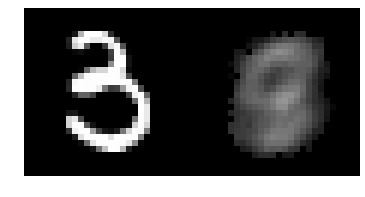

In [17]:
raw_features,raw_labels=get_next_minibatch(minibatch_size)
input=torch.from_numpy(raw_features)
input=Variable(input)
input=input.cuda()
z_vae, mu, logvar = model2(input)
results=z_vae.cpu().detach().numpy()
#實際值
actual=np.reshape(raw_features[0,:]*255,(28,28)).astype(np.uint8)
pred=np.reshape(results[0,:]*255,(28,28)).astype(np.uint8)

img=Image.fromarray(np.concatenate([actual,pred],axis=-1))
plt.axis('off')
plt.imshow(img, cmap='gray', interpolation='nearest')